                 Regrecion Lineal para modelo peso/altura en hombres y mujeres.

In [43]:
import pandas as pd

# Carga el archivo CSV en un DataFrame
df = pd.read_csv('alturas-pesos.csv')

# Extrae los datos para hombres
datos_hombres = df[df['Sexo'] == 'Hombre']

# Extrae los datos para mujeres
datos_mujeres = df[df['Sexo'] == 'Mujer']

In [44]:
# Muestra los primeros registros de los datos para hombres
print("Datos para hombres:")
print(datos_hombres.head())

# Muestra los primeros registros de los datos para mujeres
print("\nDatos para mujeres:")
print(datos_mujeres.head())

Datos para hombres:
     Sexo  Peso  Altura
0  Hombre   109     187
1  Hombre    73     174
2  Hombre    96     188
3  Hombre    99     182
4  Hombre    93     177

Datos para mujeres:
       Sexo  Peso  Altura
5000  Mujer    46     149
5001  Mujer    64     165
5002  Mujer    59     160
5003  Mujer    58     163
5004  Mujer    58     156


In [45]:
# Verificamos la informacion del conjunto de datos, completo o ya separados.
df.info()
datos_hombres.info()
datos_mujeres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sexo    10000 non-null  object
 1   Peso    10000 non-null  int64 
 2   Altura  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sexo    5000 non-null   object
 1   Peso    5000 non-null   int64 
 2   Altura  5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 156.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 5000 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sexo    5000 non-null   object
 1   Peso    5000 non-null   int64 
 2   Altura  5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 15

In [46]:
# utilizamos la funcion head() para dar una pequeña exploracion a los datos, lo cual nos mostrara los 5 primeros
df.head()

,Sexo,Peso,Altura
0,Hombre,109,187
1,Hombre,73,174
2,Hombre,96,188
3,Hombre,99,182
4,Hombre,93,177


<Axes: xlabel='Peso', ylabel='Altura'>

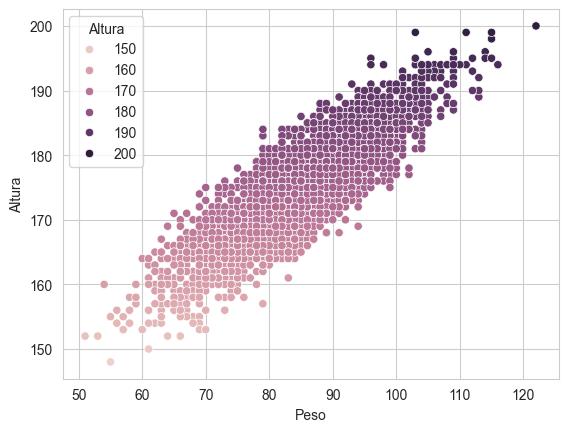

In [47]:
# procederemos a realizar dos graficas, una para Mujer y otra para Hombre
# para ello importamos la libreria seaborn  #########Hombre#########
import seaborn as sb
sb.scatterplot(x="Peso",y="Altura",hue="Altura",data=datos_hombres)

<Axes: xlabel='Peso', ylabel='Altura'>

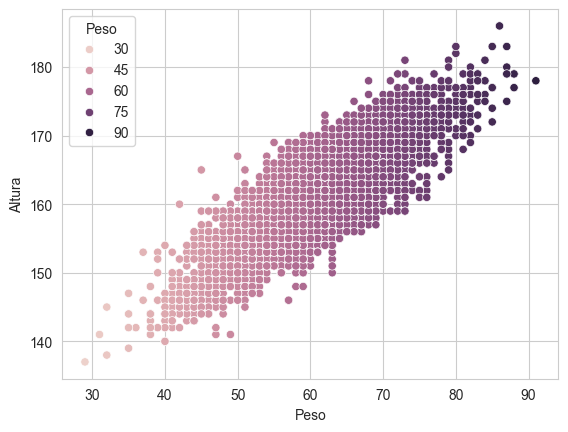

In [48]:
# procederemos a realizar dos graficas, una para Mujer y otra para Hombre
# para ello importamos la libreria seaborn #########Mujer#########
import seaborn as sb
sb.scatterplot(x="Peso",y="Altura",hue="Peso",data=datos_mujeres)

In [49]:
#   Caracterizar nuestros datos
# Procederemos a separar los datos en sus caracteristicas, en este momento solo los podemos divivir en 3 las caracteristicas, Sexo, Peso, Altura.  Debemos recordar que ya usamos pandas para separar los sexos.

# se ajustan los ejes a sus respectivas variables.
x = datos_hombres["Altura"]
y = datos_hombres["Peso"]
a = datos_mujeres["Altura"]
b = datos_mujeres["Peso"]
# Debemos trasformar el arreglo x a una matrix para poder ser procesado por el modelo.
# para ello utilizaremos la funcion X.values.reshape(-1,1), lo que devilvera la matrix
x_procesada = x.values.reshape(-1,1)
y_procesada = y.values.reshape(-1,1)
a_procesada = a.values.reshape(-1,1)
b_procesada = b.values.reshape(-1,1)

#Verificamos que sean una matrix
print(x_procesada,y_procesada,a_procesada,b_procesada)


[[187]
 [174]
 [188]
 ...
 [170]
 [181]
 [178]] [[109]
 [ 73]
 [ 96]
 ...
 [ 90]
 [ 84]
 [ 90]] [[149]
 [165]
 [160]
 ...
 [162]
 [175]
 [157]] [[46]
 [64]
 [59]
 ...
 [58]
 [74]
 [51]]


In [50]:
# ahora importamos LinearRegression de sklearn para nuestros modelos
# Importamos LinearRegression asi (pip install scikit-learn) 
from sklearn.linear_model import LinearRegression
#definimos el tipo de modelo como LinearRegression
modeloHombres = LinearRegression()
modeloMujeres = LinearRegression()

# ahora realizaremos el entrenamiento con la funcion fit para el modeloHombres
modeloHombres.fit(x_procesada,y_procesada)
# ahora realizaremos el entrenamiento con la funcion fit para el modeloMujeres
modeloMujeres.fit(a_procesada,b_procesada)

LinearRegression()

In [51]:
#Revisamos nuestro modeloHombres para verificar que este entrenado.
modeloHombres.predict([[172]])

array([[81.3384794]])

In [52]:
#Ahora podemos verificar que tan bien entrenado quedo con la funcion score()
modeloHombres.score(x_procesada, y_procesada)

0.7427755960956413

In [53]:
#Revisamos nuestro modeloMujeres para verificar que este entrenado.
modeloMujeres.predict([[172]])

array([[72.51603338]])

In [54]:
#Ahora podemos verificar que tan bien entrenado quedo con la funcion score()
modeloMujeres.score(a_procesada, b_procesada)

0.7199387019311321